In [1]:
# Importing libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading Data 
product_data = pd.read_csv('buynomics_product.csv')
sales_data = pd.read_csv('buynomics_sales.csv')

In [3]:
# Dropping Unnamed columns
product_data = product_data.drop('Unnamed: 0', axis = 1)
product_data.head(10)

,brand,flavour,volume_per_joghurt_g,packsize,product_id
0,Mueller,blueberry,150,6,0
1,Oikos,chocolate,1000,1,1
2,Alnatura,strawberry,1000,1,2
3,Mueller,straciatella,500,6,3
4,Danone,straciatella,150,6,4
5,Danone,strawberry,150,1,5
6,Alnatura,raspberry,500,6,6
7,Rewe,strawberry,1000,6,7
8,Alnatura,straciatella,150,6,8
9,Activia,blueberry,1000,6,9


In [4]:
# Dropping Unnamed columns
sales_data = sales_data.drop('Unnamed: 0', axis = 1)
sales_data.head(10)

,date,product_id,price,units
0,2020-01-01,0,4.65,1126.0
1,2020-01-02,0,4.76,1205.0
2,2020-01-03,0,5.22,1007.0
3,2020-01-04,0,5.45,1282.0
4,2020-01-05,0,3.33,1037.0
5,2020-01-06,0,4.06,1239.0
6,2020-01-07,0,4.17,1780.0
7,2020-01-08,0,3.87,1453.0
8,2020-01-09,0,4.40,1430.0
9,2020-01-10,0,6.11,1142.0


In [5]:
# Merge Data on common key
data = product_data.merge(sales_data, on='product_id', how='outer')
data.head(50)

,brand,flavour,volume_per_joghurt_g,packsize,product_id,date,price,units
0,Mueller,blueberry,150,6,0,2020-01-01,4.65,1126.0
1,Mueller,blueberry,150,6,0,2020-01-02,4.76,1205.0
2,Mueller,blueberry,150,6,0,2020-01-03,5.22,1007.0
3,Mueller,blueberry,150,6,0,2020-01-04,5.45,1282.0
4,Mueller,blueberry,150,6,0,2020-01-05,3.33,1037.0
5,Mueller,blueberry,150,6,0,2020-01-06,4.06,1239.0
6,Mueller,blueberry,150,6,0,2020-01-07,4.17,1780.0
7,Mueller,blueberry,150,6,0,2020-01-08,3.87,1453.0
8,Mueller,blueberry,150,6,0,2020-01-09,4.40,1430.0
9,Mueller,blueberry,150,6,0,2020-01-10,6.11,1142.0


In [6]:
# Convert date column to datetime type for time-based analysis
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   brand                 260 non-null    object        
 1   flavour               260 non-null    object        
 2   volume_per_joghurt_g  260 non-null    int64         
 3   packsize              260 non-null    int64         
 4   product_id            260 non-null    int64         
 5   date                  260 non-null    datetime64[ns]
 6   price                 260 non-null    float64       
 7   units                 260 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 18.3+ KB


## Exploratory Data Analysis

In [8]:
# Basic Descriptive Statistics
descriptive_stats = data[['price', 'units', 'volume_per_joghurt_g', 'packsize']].describe()
print(descriptive_stats)

            price        units  volume_per_joghurt_g    packsize
count  260.000000   260.000000            260.000000  260.000000
mean     5.288538  1177.496154            611.538462    4.653846
std      1.881547   401.771103            335.282884    2.222078
min      1.460000    16.000000            150.000000    1.000000
25%      3.965000   944.000000            500.000000    1.000000
50%      5.140000  1275.500000            500.000000    6.000000
75%      6.785000  1453.250000           1000.000000    6.000000
max      9.420000  2170.000000           1000.000000    6.000000


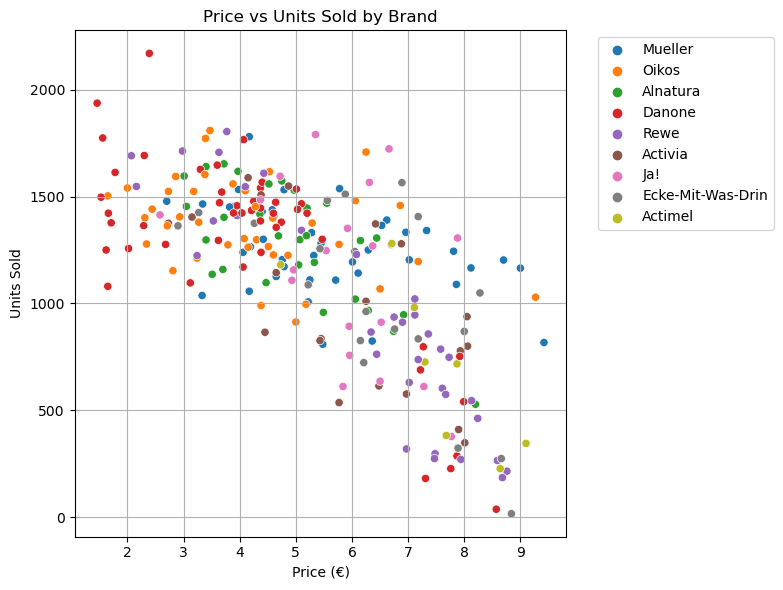

In [9]:
# Scatter plot of Price vs Units Sold by Brand
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='price', y='units', hue='brand')
plt.title('Price vs Units Sold by Brand')
plt.xlabel('Price (€)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

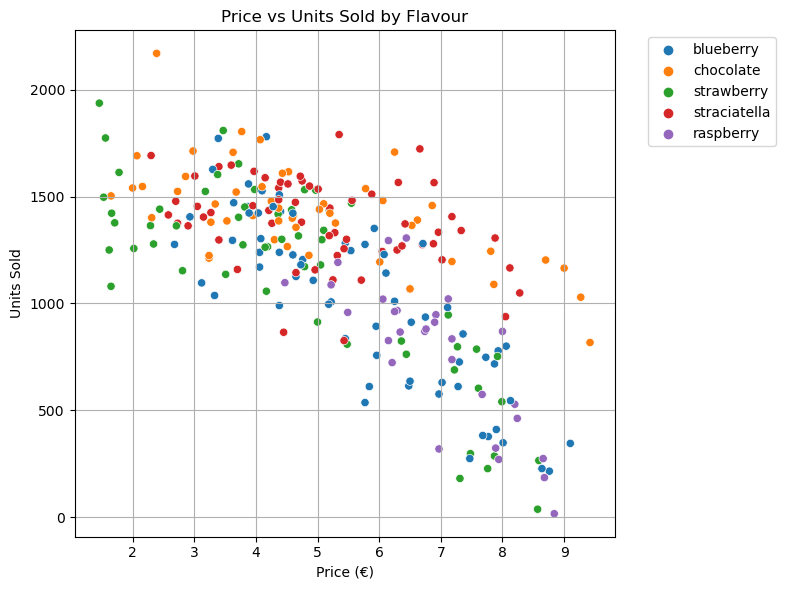

In [10]:
# Scatter plot of Price vs Units Sold by flavour
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='price', y='units', hue='flavour')
plt.title('Price vs Units Sold by Flavour')
plt.xlabel('Price (€)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

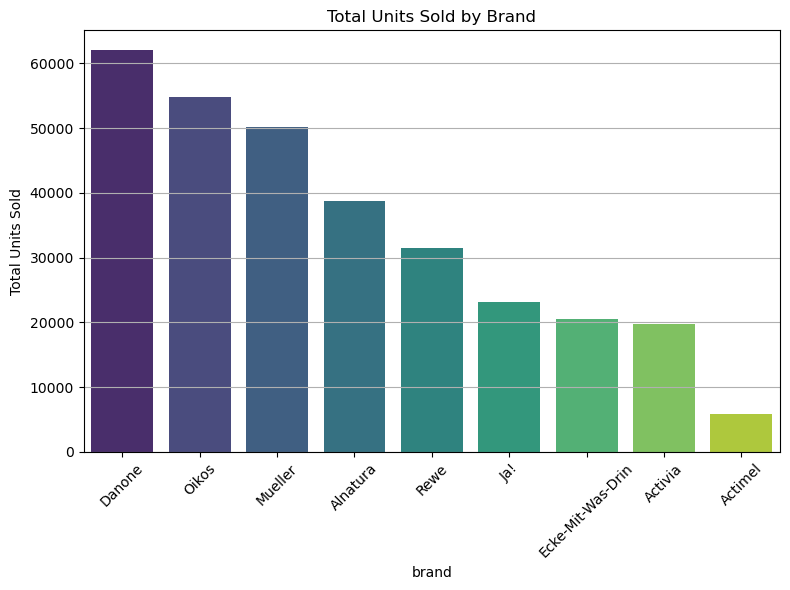

In [11]:
# Sales Distribution by Brand
plt.figure(figsize=(8, 6))
brand_sales = data.groupby('brand')['units'].sum().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='viridis')
plt.title('Total Units Sold by Brand')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

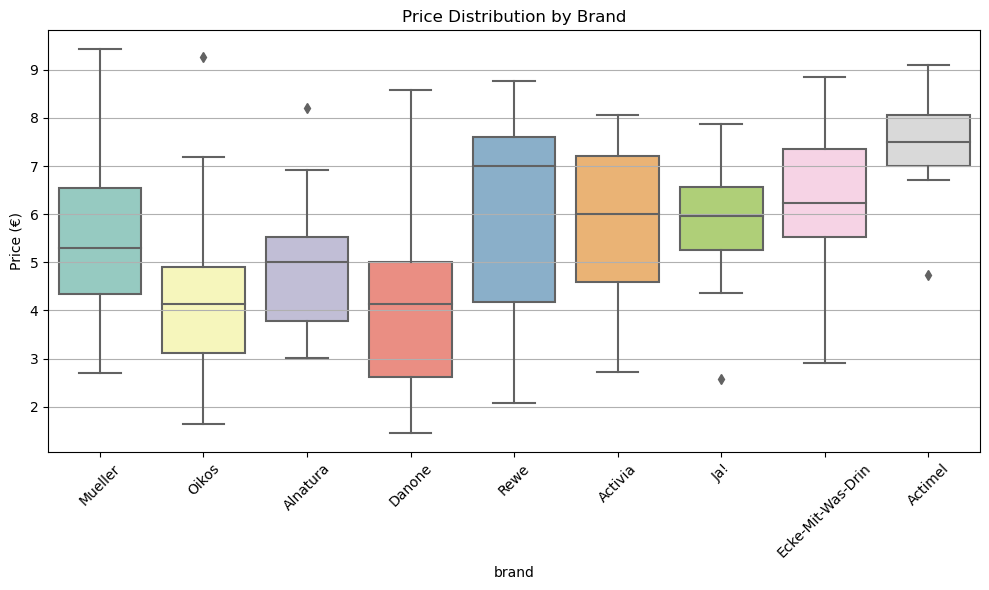

In [12]:
# Price Distribution by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='brand', y='price', palette='Set3')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.ylabel('Price (€)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

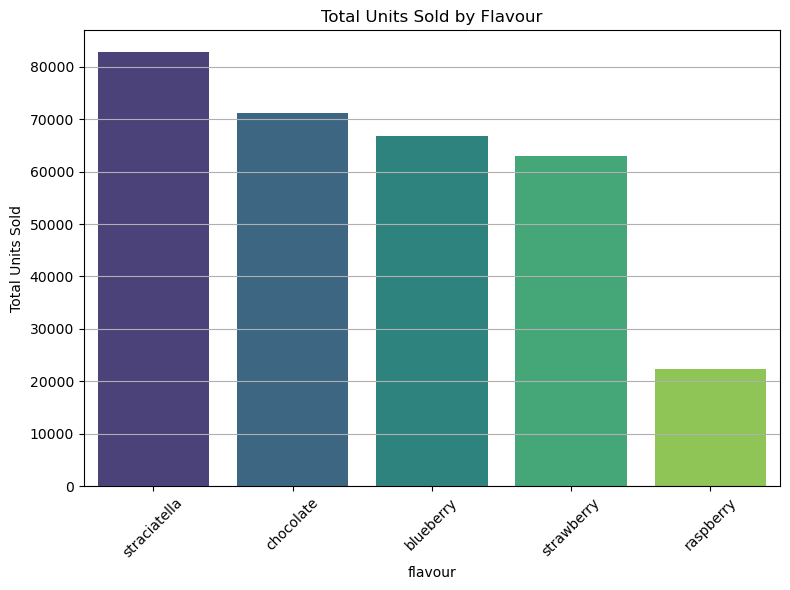

In [13]:
# Sales Distribution by flavour
plt.figure(figsize=(8, 6))
brand_sales = data.groupby('flavour')['units'].sum().sort_values(ascending=False)
sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='viridis')
plt.title('Total Units Sold by Flavour')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

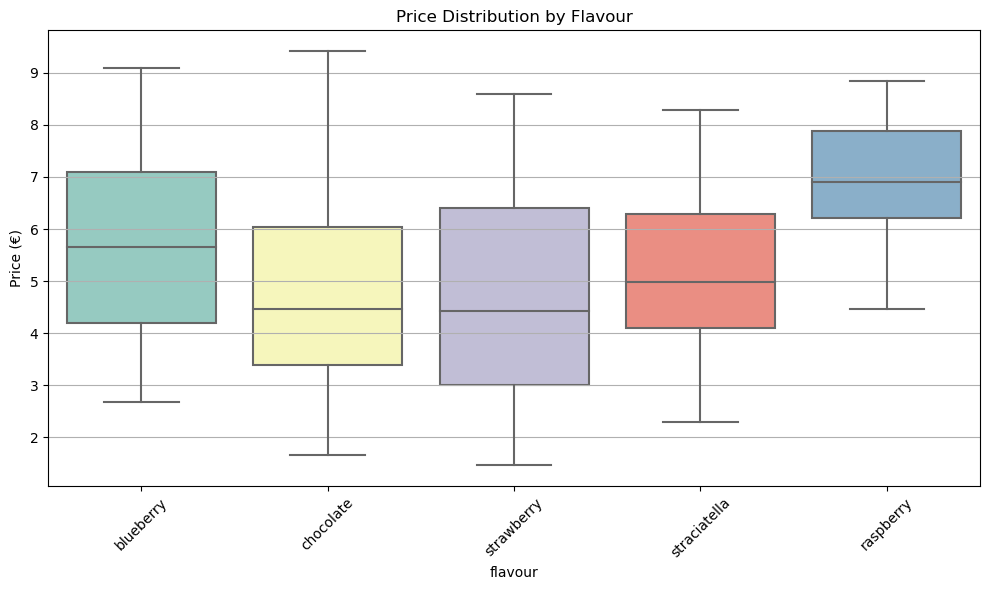

In [14]:
# Price Distribution by flavour
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='flavour', y='price', palette='Set3')
plt.title('Price Distribution by Flavour')
plt.xticks(rotation=45)
plt.ylabel('Price (€)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

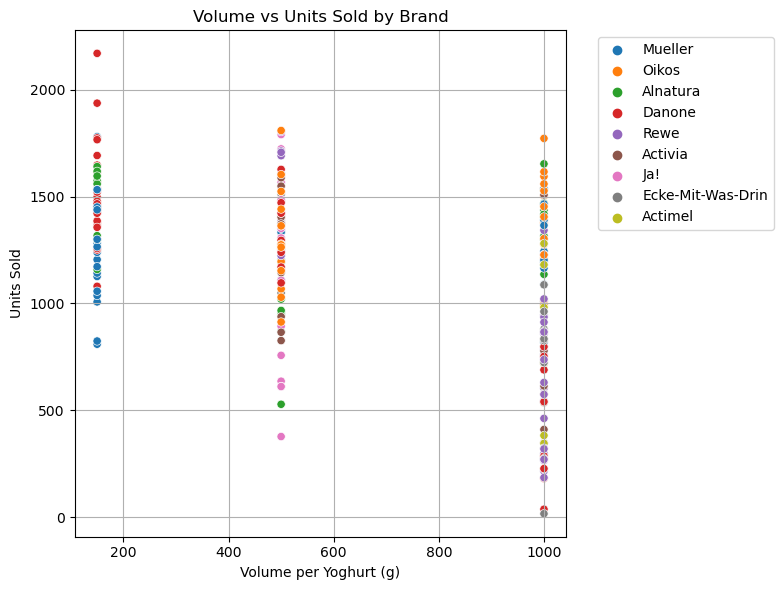

In [15]:
# Units Sold vs Volume per Yoghurt (Brand)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='volume_per_joghurt_g', y='units', hue='brand')
plt.title('Volume vs Units Sold by Brand')
plt.xlabel('Volume per Yoghurt (g)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

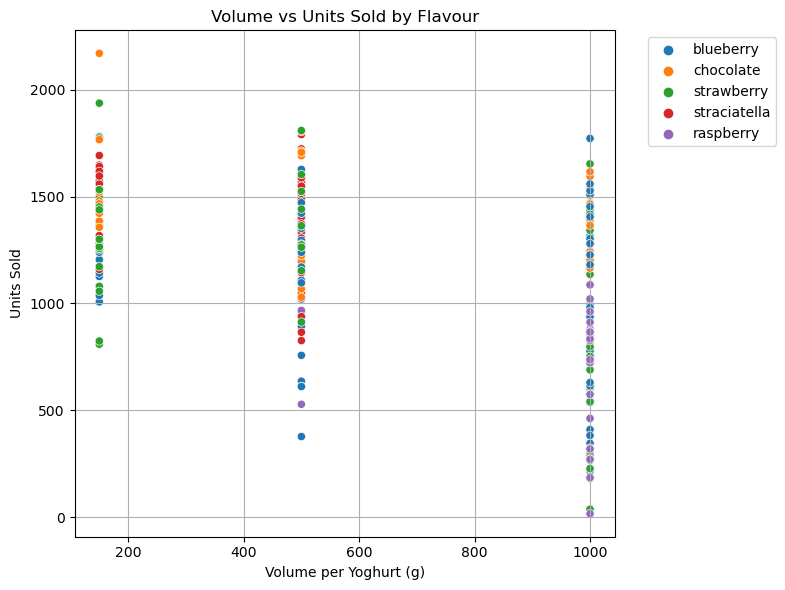

In [16]:
# Units Sold vs Volume per Yoghurt (Flavour)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='volume_per_joghurt_g', y='units', hue='flavour')
plt.title('Volume vs Units Sold by Flavour')
plt.xlabel('Volume per Yoghurt (g)')
plt.ylabel('Units Sold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Prediction Model

In [17]:
# Select features and target
features = data.drop(columns=['units', 'date', 'product_id'])
target = data['units']

In [18]:
# For categorical variables like 'brand' and 'flavour', apply one-hot encoding
features = pd.get_dummies(features)
feature_columns = features.columns

In [19]:
features

,volume_per_joghurt_g,packsize,price,brand_Actimel,brand_Activia,brand_Alnatura,brand_Danone,brand_Ecke-Mit-Was-Drin,brand_Ja!,brand_Mueller,brand_Oikos,brand_Rewe,flavour_blueberry,flavour_chocolate,flavour_raspberry,flavour_straciatella,flavour_strawberry
0,150,6,4.65,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,150,6,4.76,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,150,6,5.22,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,150,6,5.45,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,150,6,3.33,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,500,1,3.18,0,0,0,0,0,0,0,1,0,0,0,0,0,1
256,500,1,2.81,0,0,0,0,0,0,0,1,0,0,0,0,0,1
257,500,1,5.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1
258,500,1,3.38,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [20]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on test set
y_pred = model.predict(X_test)

In [23]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model RMSE: {rmse:.2f}")
print(f"Model R²: {r2:.2f}")

Model RMSE: 235.47
Model R²: 0.72


In [24]:
# Compare to a baseline model (always predicting average units)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, baseline_pred)

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Baseline R²: {baseline_r2:.2f}")

Baseline RMSE: 463.56
Baseline R²: -0.10


In [25]:
# Show coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                    Feature  Coefficient
0      volume_per_joghurt_g    -0.084287
1                  packsize   -30.236163
2                     price  -102.736574
3             brand_Actimel   -13.403205
4             brand_Activia  -120.520605
5            brand_Alnatura   102.340708
6              brand_Danone   -24.469138
7   brand_Ecke-Mit-Was-Drin    36.649194
8                 brand_Ja!    53.971633
9             brand_Mueller    94.307911
10              brand_Oikos   -25.936535
11               brand_Rewe  -102.939964
12        flavour_blueberry  -110.657599
13        flavour_chocolate   221.425119
14        flavour_raspberry  -165.274080
15     flavour_straciatella   190.964946
16       flavour_strawberry  -136.458387


## Revenue Optimization Simulation

In [26]:
# Picking one example product 
example_product = data.iloc[49]

In [27]:
# A function to simulate revenue
def simulate_revenue(price_range, product_attributes, model, feature_columns):
    simulated_prices = np.linspace(price_range[0], price_range[1], 50)
    
    simulated_data = []
    for price in simulated_prices:
        row = product_attributes.copy()
        row['price'] = price
        
        row = row.drop('units')  
        row = row.drop('date')  
        row = row.drop('product_id')
        simulated_data.append(row)
    
    simulated_df = pd.DataFrame(simulated_data)
    simulated_df = pd.get_dummies(simulated_df)
    simulated_df = simulated_df.reindex(columns=feature_columns, fill_value=0)
    
    simulated_units = model.predict(simulated_df)
    simulated_revenue = simulated_prices * simulated_units
    
    return simulated_prices, simulated_units, simulated_revenue

In [28]:
# Define price range (e.g., 50% lower to 50% higher)
current_price = example_product['price']
price_range = (current_price * 0.5, current_price * 1.5)

In [29]:
# Simulate
sim_prices, sim_units, sim_revenue = simulate_revenue(price_range, example_product, model, feature_columns)

In [30]:
price_range

(2.2, 6.6000000000000005)

In [31]:
example_product

brand                                Danone
flavour                        straciatella
volume_per_joghurt_g                    150
packsize                                  6
product_id                                4
date                    2020-01-10 00:00:00
price                                   4.4
units                                1567.0
Name: 49, dtype: object

In [32]:
# Find the optimal price
optimal_index = np.argmax(sim_revenue)
optimal_price = sim_prices[optimal_index]
optimal_revenue = sim_revenue[optimal_index]
optimal_units = sim_units[optimal_index]

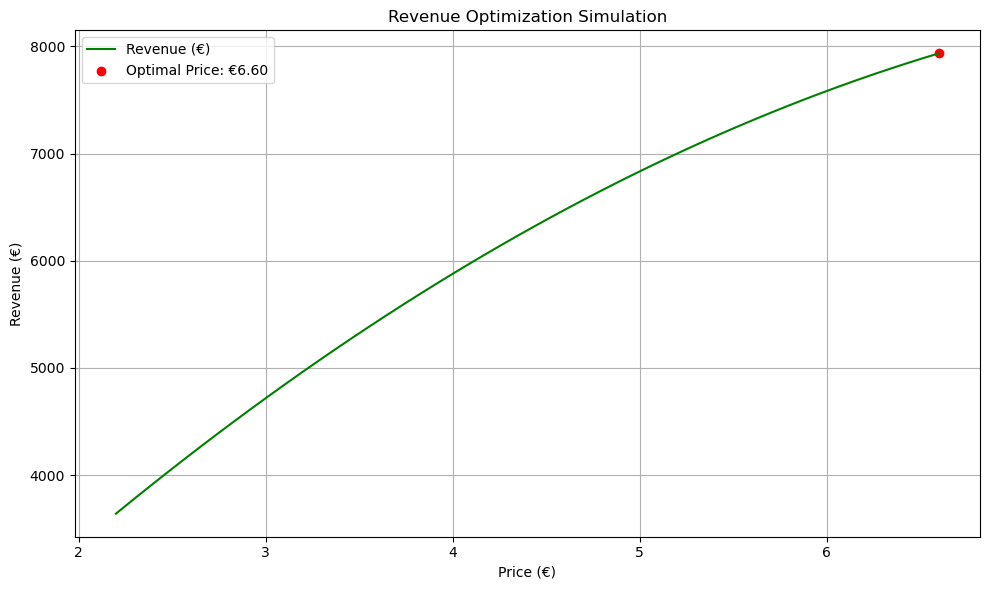

In [33]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sim_prices, sim_revenue, label='Revenue (€)', color='green')
plt.scatter(optimal_price, optimal_revenue, color='red', label=f'Optimal Price: €{optimal_price:.2f}')
plt.title('Revenue Optimization Simulation')
plt.xlabel('Price (€)')
plt.ylabel('Revenue (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Print optimal results
print(f"Optimal Price: €{optimal_price:.2f}")
print(f"Expected Revenue: €{optimal_revenue:.2f}")
print(f"Expected Units Sold: {optimal_units:.0f}")

Optimal Price: €6.60
Expected Revenue: €7935.66
Expected Units Sold: 1202
